## A simple play with HADISST by Tianxiang Gao - Sam edited*

[The Hadley Centre Global Sea Ice and Sea Surface Temperature (HadISST)](https://climatedataguide.ucar.edu/climate-data/sst-data-hadisst-v11) is a combination of monthyl globally complete fields of SST and sea ice concentration for 1871 - present. Spatial resolution is 1° x 1°.

Data can be downloaded in netCDF, txt, or ascii format from this [link](https://www.metoffice.gov.uk/hadobs/hadisst/data/download.html). On this webpage click on 'Download Data >>' and it should take you the 'Met Office Hadley Centre observation datasets' page with a bunch SST and Sea ICE data for users to download. At the very bottom of the page, there are 4 links of netCDF files to download. Download the HADISSY_sst.nc.gz (~212Mb) file.

(* I just assumed that this is the file that was originally worked with) 


As I was testing the environment, I noticed that HadISST.yml file didn't have netCDF4 to open this nc file. I added a new yml file with netCDF4 in it so this notebook would be able to open the data file. It is called HadISST_edit.yml. 

I also added cartopy to plot it in a different way

Anything I added or edited to this notebook I put # added next to it. 

In [9]:
import xarray as xr 
import cmocean.cm as cmo
import matplotlib.pyplot as plt    # added 

In [10]:
# read HADISST monthly data 
ds = xr.open_dataset('HADISST_sst.nc')
ds # added (renamed to ds so I wouldn't get confused)

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1805)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2020-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    17/7/2020 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

<ipython-input-11-7fe663abef47>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([170, 160, 150, 140, 130, 120], fontsize=12)


Text(0.5, 1.0, 'Sea Surface Temperature (SST) Anomaly of Nino3.4 Region, 2020-05')

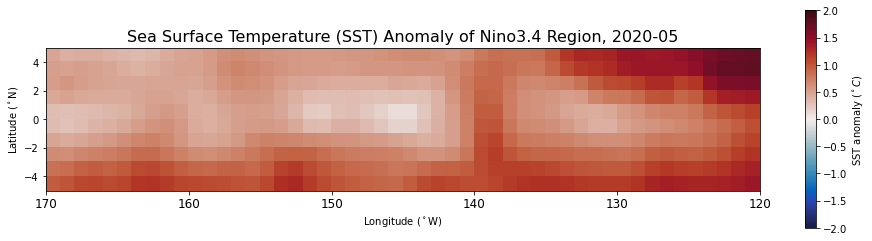

In [11]:
lon0 = -170
lon1 = -120
lat0 = -5
lat1 = 5

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)

# get anomaly from climatology
clim = ds.sst.isel(latitude=slice(lat0+90, lat1+90), longitude=slice(10,60)).mean(axis=0)
data = ds.sst.isel(time=-1,latitude=slice(lat0+90, lat1+90), longitude=slice(10,60))
temp = data - clim
temp.name = 'SST anomaly ($^\circ C$)'


m = temp.plot(cmap=cmo.balance, vmin= -2, vmax=2)
ax.set_aspect('equal')
ax.set_xticklabels([170, 160, 150, 140, 130, 120], fontsize=12)
plt.xlabel(r'Longitude ($^\circ $W)')
plt.ylabel(r'Latitude ($^\circ $N)')
plt.title('Sea Surface Temperature (SST) Anomaly of Nino3.4 Region, ' + str(temp.time.values)[:7], fontsize=16)